In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import os
from astropy.io import fits
from astropy.table import Table
import img_scale
from astropy.wcs import wcs
from glob import glob

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [2]:
gsd_cat = Table.read('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat', format='ascii').to_pandas()
gnd_cat = Table.read('/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat', format='ascii').to_pandas()

In [97]:
list(gsd_cat.keys())

['id',
 'x',
 'y',
 'ra',
 'dec',
 'faper_F160W',
 'eaper_F160W',
 'faper_F140W',
 'eaper_F140W',
 'f_F160W',
 'e_F160W',
 'w_F160W',
 'f_U38',
 'e_U38',
 'w_U38',
 'f_U',
 'e_U',
 'w_U',
 'f_F435W',
 'e_F435W',
 'w_F435W',
 'f_B',
 'e_B',
 'w_B',
 'f_V',
 'e_V',
 'w_V',
 'f_F606Wcand',
 'e_F606Wcand',
 'w_F606Wcand',
 'f_F606W',
 'e_F606W',
 'w_F606W',
 'f_R',
 'e_R',
 'w_R',
 'f_Rc',
 'e_Rc',
 'w_Rc',
 'f_F775W',
 'e_F775W',
 'w_F775W',
 'f_I',
 'e_I',
 'w_I',
 'f_F814Wcand',
 'e_F814Wcand',
 'w_F814Wcand',
 'f_F850LP',
 'e_F850LP',
 'w_F850LP',
 'f_F850LPcand',
 'e_F850LPcand',
 'w_F850LPcand',
 'f_F125W',
 'e_F125W',
 'w_F125W',
 'f_J',
 'e_J',
 'w_J',
 'f_tenisJ',
 'e_tenisJ',
 'w_tenisJ',
 'f_F140W',
 'e_F140W',
 'w_F140W',
 'f_H',
 'e_H',
 'w_H',
 'f_tenisK',
 'e_tenisK',
 'w_tenisK',
 'f_Ks',
 'e_Ks',
 'w_Ks',
 'f_IRAC1',
 'e_IRAC1',
 'w_IRAC1',
 'f_IRAC2',
 'e_IRAC2',
 'w_IRAC2',
 'f_IRAC3',
 'e_IRAC3',
 'w_IRAC3',
 'f_IRAC4',
 'e_IRAC4',
 'w_IRAC4',
 'f_IA427',
 'e_IA427',
 '

In [57]:
GS2_flist = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS2/*/Prep/*full.png')

In [58]:
GS2_ids = [int(os.path.basename(U).split('.')[0].split('_')[1]) for U in GS2_flist]

In [59]:
seg = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F160W_seg.fits')
# f160 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F160W_orig_sci.fits')
# f140 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F140W_orig_sci.fits')
f125 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F125W_orig_sci.fits')
# f105 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss-F105W-astrodrizzle-v4.4_drz_sci.fits')

In [81]:
ra,dec = [[],[]]
kr,fr = [[],[]]
for i in GS2_ids:
    ra.append(gsd_cat.query('id == {0}'.format(i)).ra.values[0] )
    dec.append(gsd_cat.query('id == {0}'.format(i)).dec.values[0] )    
    kr.append(gsd_cat.query('id == {0}'.format(i)).kron_radius.values[0])
    fr.append(gsd_cat.query('id == {0}'.format(i)).flux_radius.values[0])    

In [86]:
GS2_DF = pd.DataFrame({'ids':GS2_ids, 'ra' : ra, 'dec' : dec, 'kr':kr, 'fr':fr})

In [62]:
w = wcs.WCS(f125[0].header)

pos = w.wcs_world2pix(np.array([GS2_DF.ra,GS2_DF.dec]).T, 1)

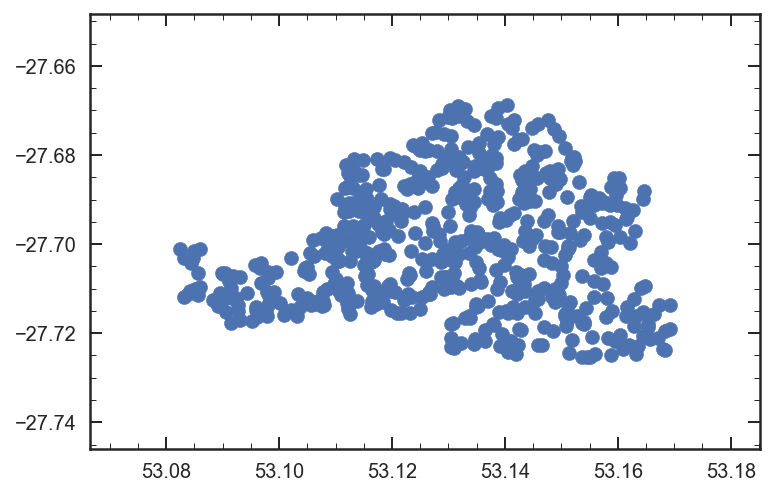

In [63]:
plt.scatter(GS2_DF.ra,GS2_DF.dec)


In [64]:
xlims = np.array([min(pos.T[0]) - 20, max(pos.T[0]) + 20]).astype(int)
ylims = np.array([min(pos.T[1])- 20, max(pos.T[1])+ 20]).astype(int) 

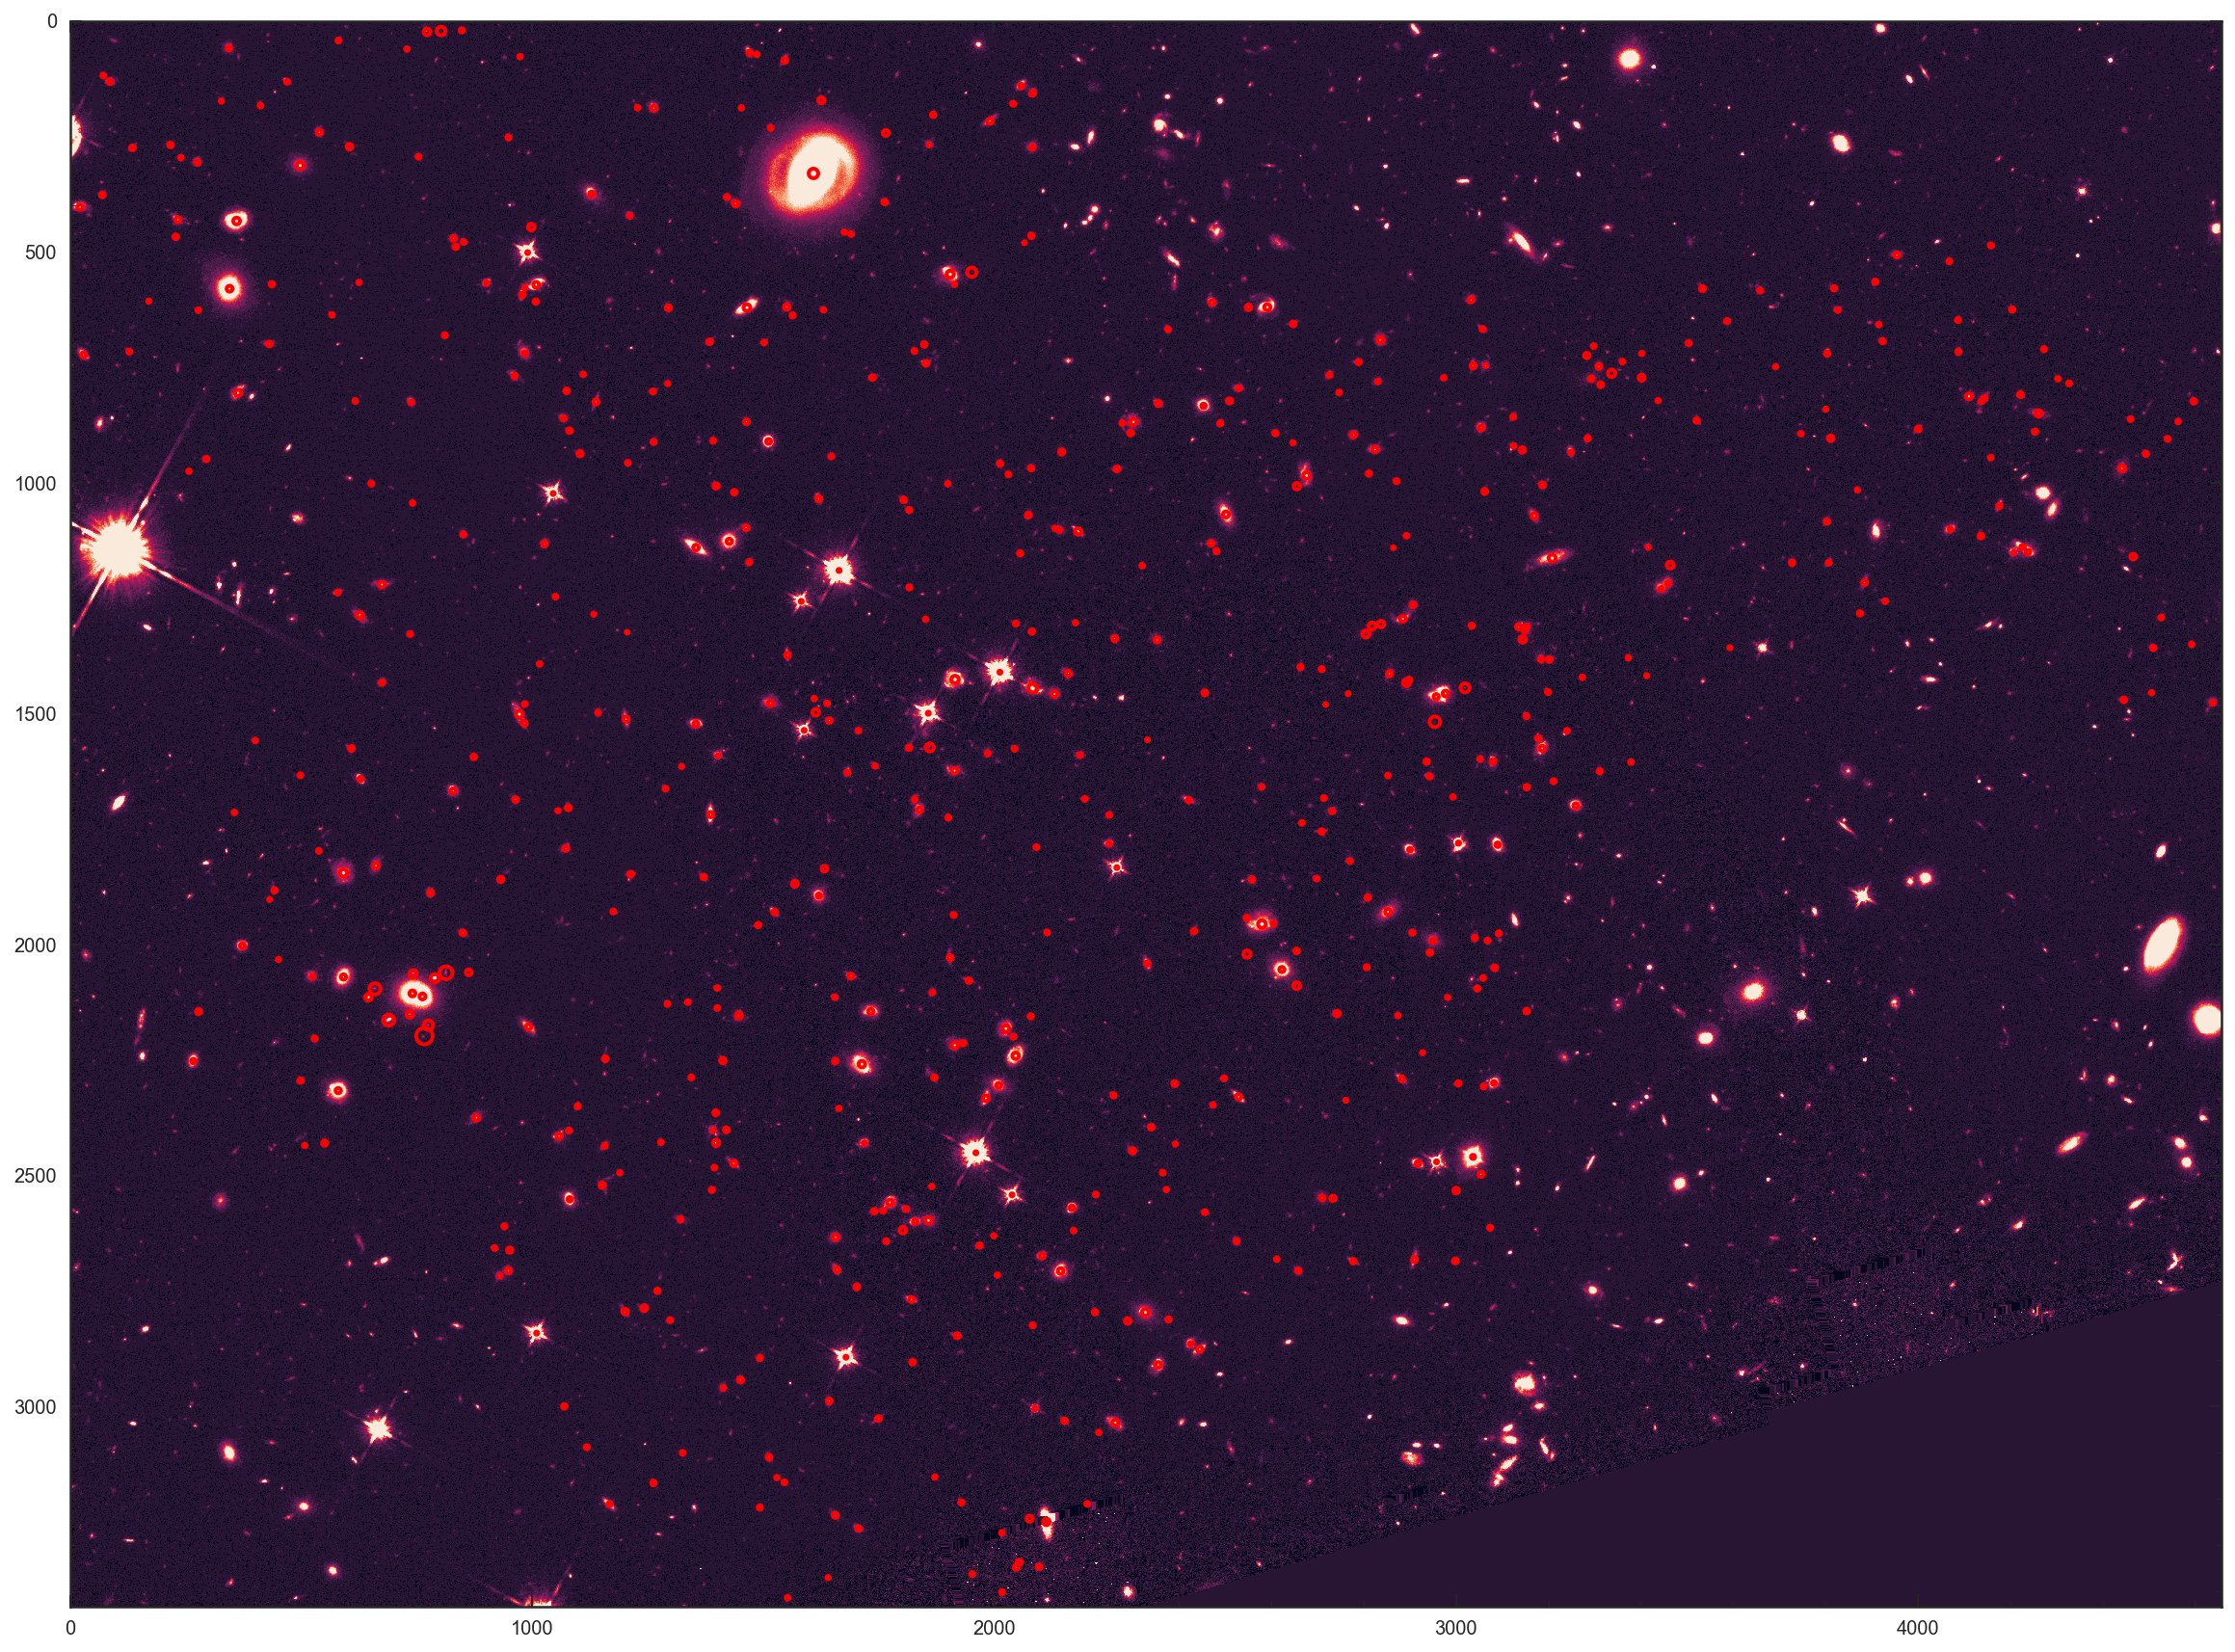

In [92]:
fig = plt.figure(figsize=[20,20])


plt.imshow(f125[0].data[ylims[0]:ylims[1],xlims[0]:xlims[1]], vmin = -0.01, vmax = 0.1)

plt.scatter(pos.T[0] - xlims[0], pos.T[1]- ylims[0],marker='o', s=(72./fig.dpi)**2 * GS2_DF.fr.values, facecolors='none',edgecolors='r', linewidth=2)


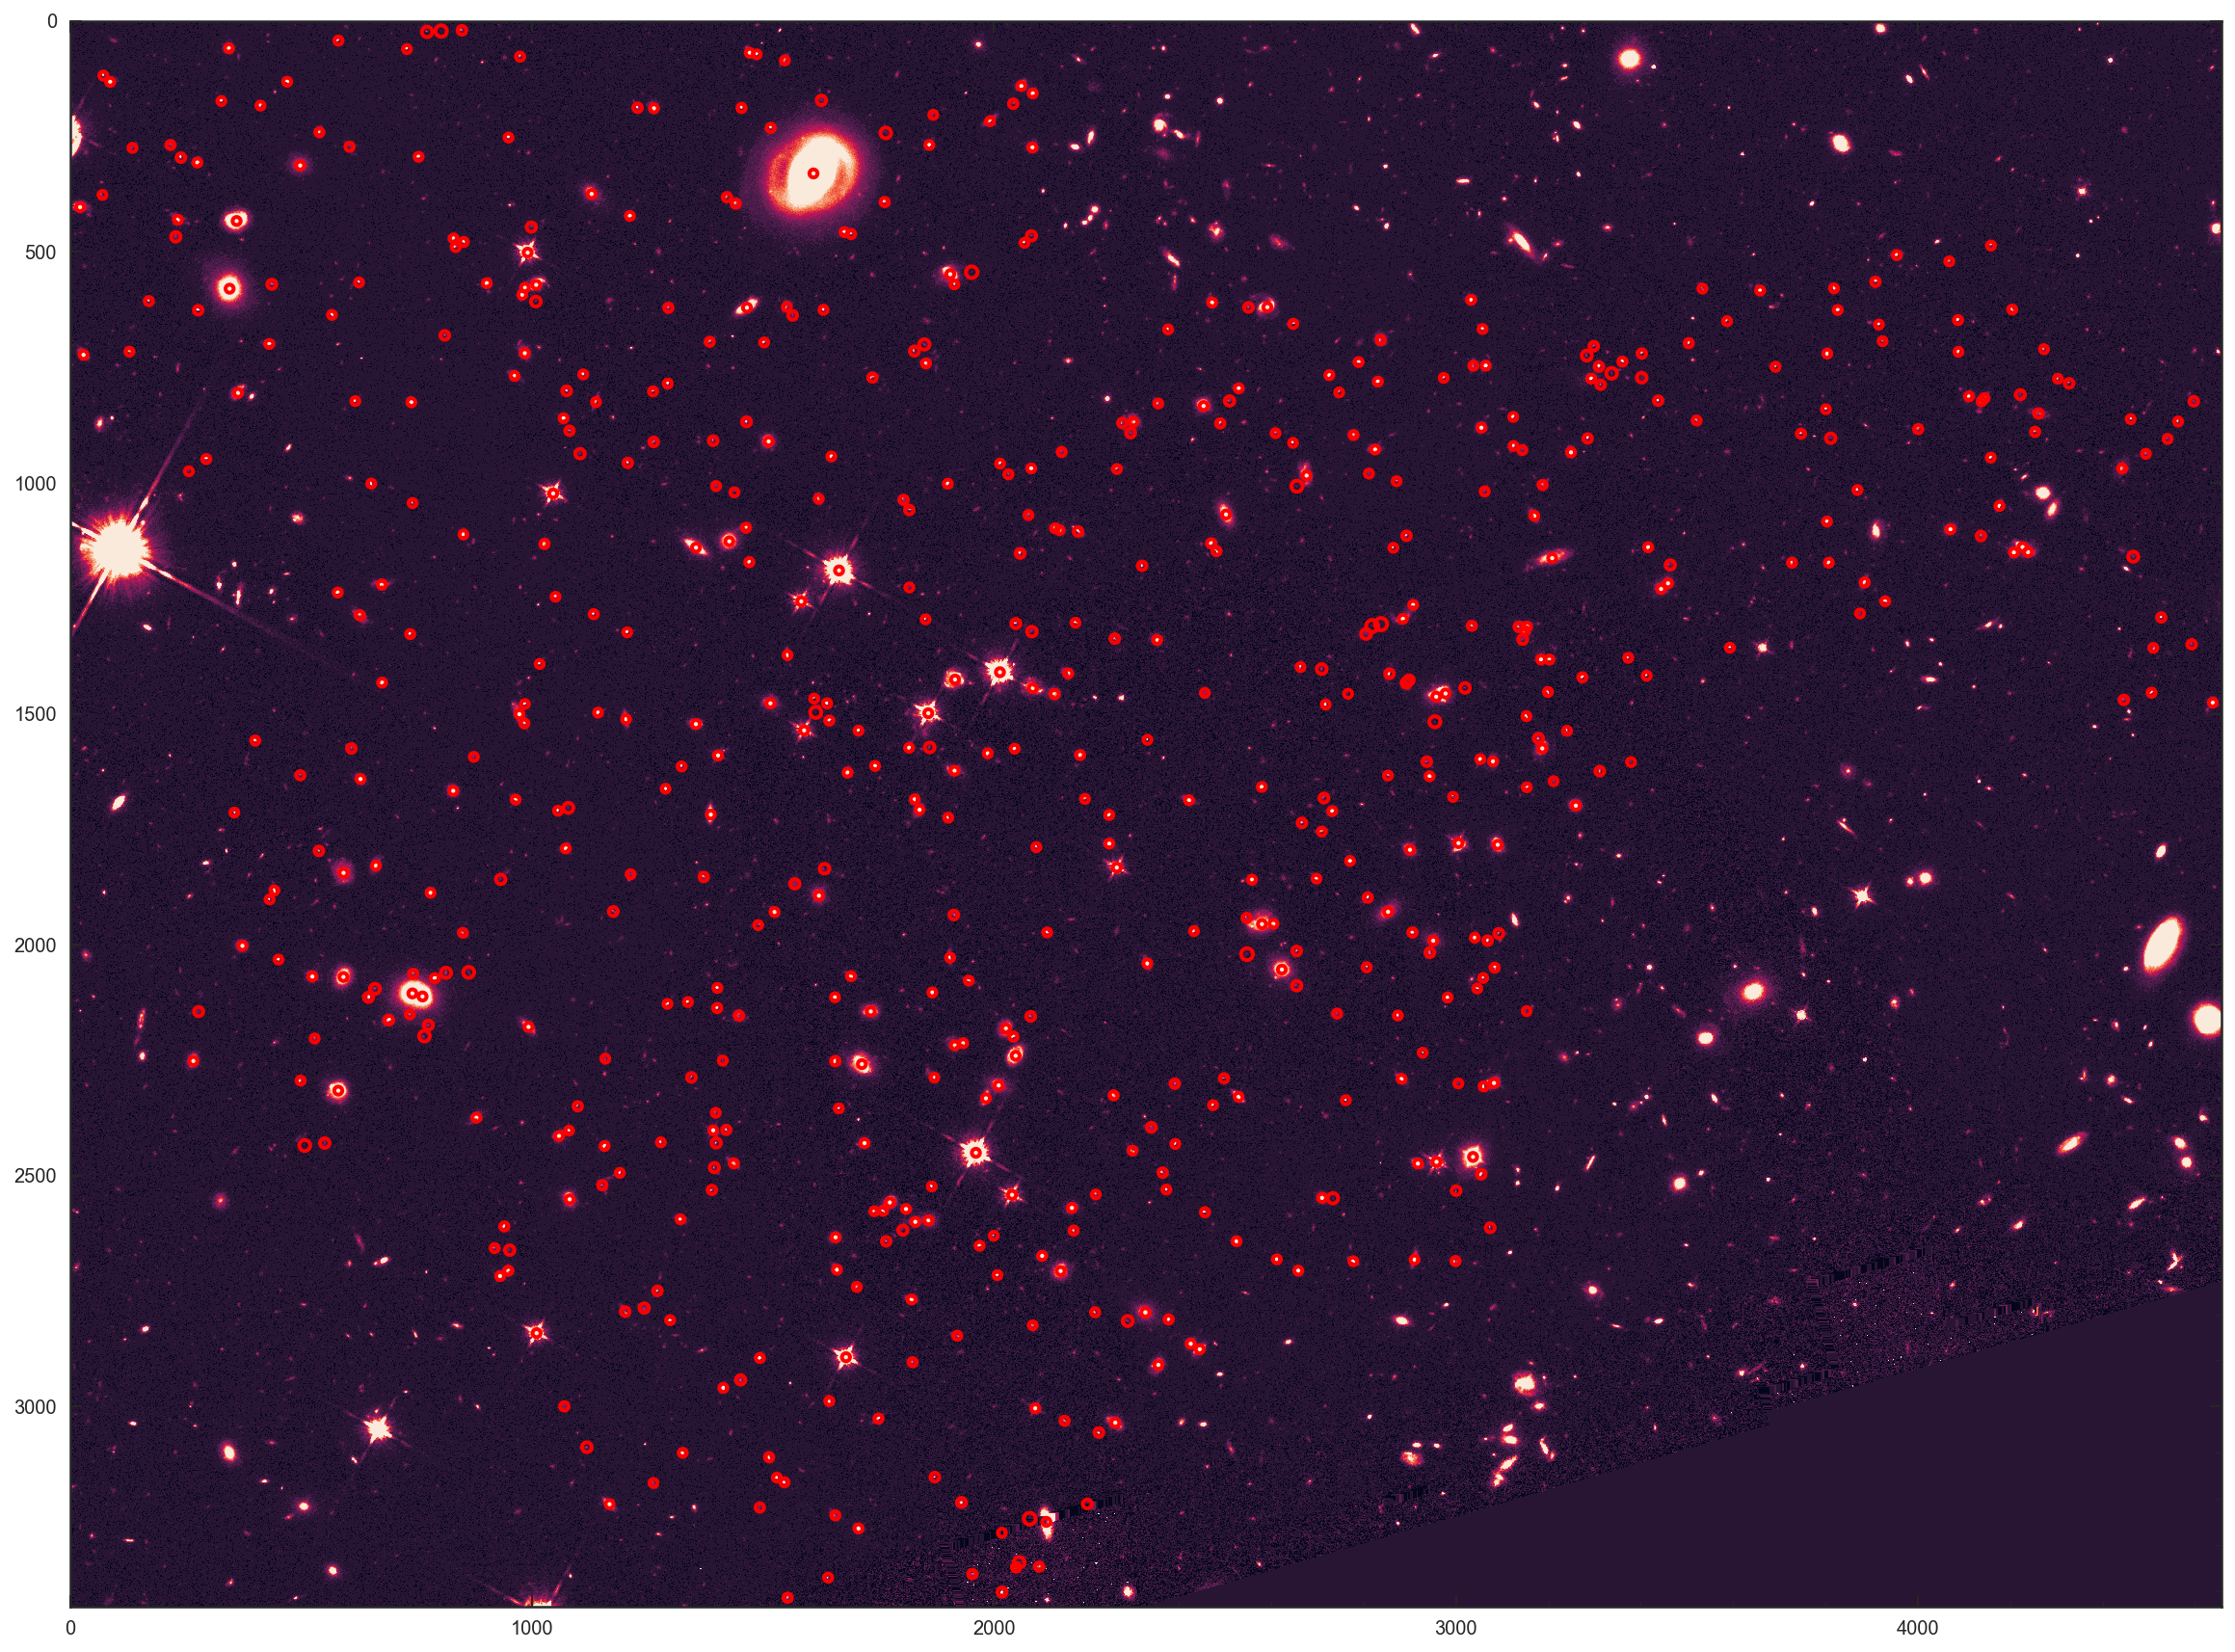

In [95]:
fig = plt.figure(figsize=[20,20])


plt.imshow(f125[0].data[ylims[0]:ylims[1],xlims[0]:xlims[1]], vmin = -0.01, vmax = 0.1)

plt.scatter(pos.T[0] - xlims[0], pos.T[1]- ylims[0],marker='o', s=(72./fig.dpi)**2 * GS2_DF.kr.values * 5, facecolors='none',edgecolors='r', linewidth=2)

In [91]:
(72./fig.dpi)**2 * GS2_DF.fr.values

array([24.368, 12.644,  4.944,  5.393,  5.908,  4.104, 20.252,  3.256,
        3.475,  5.146,  3.606,  4.203,  6.681,  4.494,  4.731,  5.301,
        6.841,  3.008,  5.877,  3.848,  3.191,  3.953,  4.236, 10.483,
        5.326,  9.837,  4.47 , 12.636,  8.311,  5.667,  9.258,  7.087,
        6.349,  3.704,  8.828,  6.065,  2.294,  4.025,  5.407,  5.457,
        5.959, 12.067,  4.897,  5.742,  8.131,  8.82 ,  2.283,  3.664,
        3.48 ,  4.048,  5.645,  2.297,  7.679,  5.969,  4.419,  5.669,
        4.347, 12.123,  6.161,  4.324,  9.194,  7.02 , 13.928, 23.469,
        3.174,  3.935,  3.305,  5.303,  4.959,  3.125,  6.758, 10.337,
        5.454,  5.165,  3.675,  4.637,  3.713,  3.625, 12.39 ,  8.425,
        6.699,  5.699,  5.258,  3.732,  4.659,  6.902,  6.758,  6.244,
        5.055,  8.54 ,  3.587,  3.956,  4.206,  4.352,  4.869,  4.229,
        5.251,  4.332,  5.811,  4.953,  4.494,  6.003,  3.322,  4.569,
       11.172,  4.572,  6.087,  4.507,  8.091,  4.743,  4.679,  4.063,
      